# Decision Tree

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Read the data

In [3]:
df = pd.read_excel("./heart_disease.xlsx", sheet_name="Heart_disease")

In [4]:
df1 = df.copy()

In [5]:
df1.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0


In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    object 
 2   cp        908 non-null    object 
 3   trestbps  908 non-null    int64  
 4   chol      908 non-null    int64  
 5   fbs       908 non-null    bool   
 6   restecg   908 non-null    object 
 7   thalch    908 non-null    int64  
 8   exang     908 non-null    object 
 9   oldpeak   846 non-null    float64
 10  slope     908 non-null    object 
 11  thal      908 non-null    object 
 12  num       908 non-null    int64  
dtypes: bool(1), float64(1), int64(5), object(6)
memory usage: 86.1+ KB


In [7]:
df1.describe()

,age,trestbps,chol,thalch,oldpeak,num
count,908.000000,908.000000,908.000000,908.000000,846.000000,908.000000
mean,53.791850,133.430617,201.484581,135.957048,0.891253,1.008811
std,9.158031,20.401608,112.097949,26.804929,1.093875,1.144436
min,29.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.750000,120.000000,176.750000,118.000000,0.000000,0.000000
50%,54.000000,130.000000,224.000000,138.000000,0.500000,1.000000
75%,60.000000,144.000000,270.000000,156.000000,1.500000,2.000000
max,77.000000,200.000000,603.000000,202.000000,6.200000,4.000000


## EDA

### Check for duplicates

In [8]:
df1[df1.duplicated(keep=False)]

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
764,58,Male,non-anginal,150,219,False,st-t abnormality,118,True,0.0,downsloping,normal,2
765,58,Male,non-anginal,150,219,False,st-t abnormality,118,True,0.0,downsloping,normal,2


In [9]:
df1.drop_duplicates(inplace=True)
df1.shape

(907, 13)

In [10]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 907 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       907 non-null    int64  
 1   sex       907 non-null    object 
 2   cp        907 non-null    object 
 3   trestbps  907 non-null    int64  
 4   chol      907 non-null    int64  
 5   fbs       907 non-null    bool   
 6   restecg   907 non-null    object 
 7   thalch    907 non-null    int64  
 8   exang     907 non-null    object 
 9   oldpeak   845 non-null    float64
 10  slope     907 non-null    object 
 11  thal      907 non-null    object 
 12  num       907 non-null    int64  
dtypes: bool(1), float64(1), int64(5), object(6)
memory usage: 93.0+ KB


In [11]:
df1.nunique()

age          49
sex           2
cp            4
trestbps     85
chol        228
fbs           2
restecg       3
thalch      122
exang         4
oldpeak      53
slope         3
thal          3
num           5
dtype: int64

In [12]:
df1.rename(columns={"trestbps": "restbps"}, inplace=True)

In [13]:
df1.head(2)

,age,sex,cp,restbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0


## Check for null values

In [14]:
df1.isnull().sum()

age         0
sex         0
cp          0
restbps     0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak    62
slope       0
thal        0
num         0
dtype: int64

### -> oldpeak has 62 missing values out of 908

### Automating EDA process

In [15]:
import ydata_profiling as pp

In [16]:
report = pp.ProfileReport(df1)

In [17]:
report.to_file(output_file='eda_report.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|█████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 216.98it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

#### From the report oldpeak seems right skewed. Since oldpeak is a continuous numeric value and right skewed, imputing with the median is usually a safe choice.

### Histogram to confirm right skewness

In [18]:
%matplotlib inline

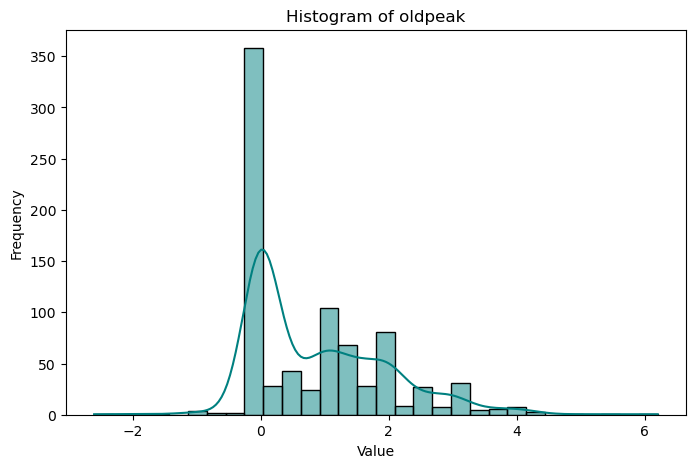

In [19]:
plt.figure(figsize=(8, 5))
sns.histplot(df1['oldpeak'], bins=30, kde=True, color='teal')
plt.title('Histogram of oldpeak')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

In [20]:
df1['oldpeak'].fillna(df1['oldpeak'].median(), inplace=True)
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 907 entries, 0 to 907
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   age      907 non-null    int64  
 1   sex      907 non-null    object 
 2   cp       907 non-null    object 
 3   restbps  907 non-null    int64  
 4   chol     907 non-null    int64  
 5   fbs      907 non-null    bool   
 6   restecg  907 non-null    object 
 7   thalch   907 non-null    int64  
 8   exang    907 non-null    object 
 9   oldpeak  907 non-null    float64
 10  slope    907 non-null    object 
 11  thal     907 non-null    object 
 12  num      907 non-null    int64  
dtypes: bool(1), float64(1), int64(5), object(6)
memory usage: 125.3+ KB


In [21]:
df1.isnull().sum()

age        0
sex        0
cp         0
restbps    0
chol       0
fbs        0
restecg    0
thalch     0
exang      0
oldpeak    0
slope      0
thal       0
num        0
dtype: int64

## Visualizing the data

### Histogram - visualise numerical columns

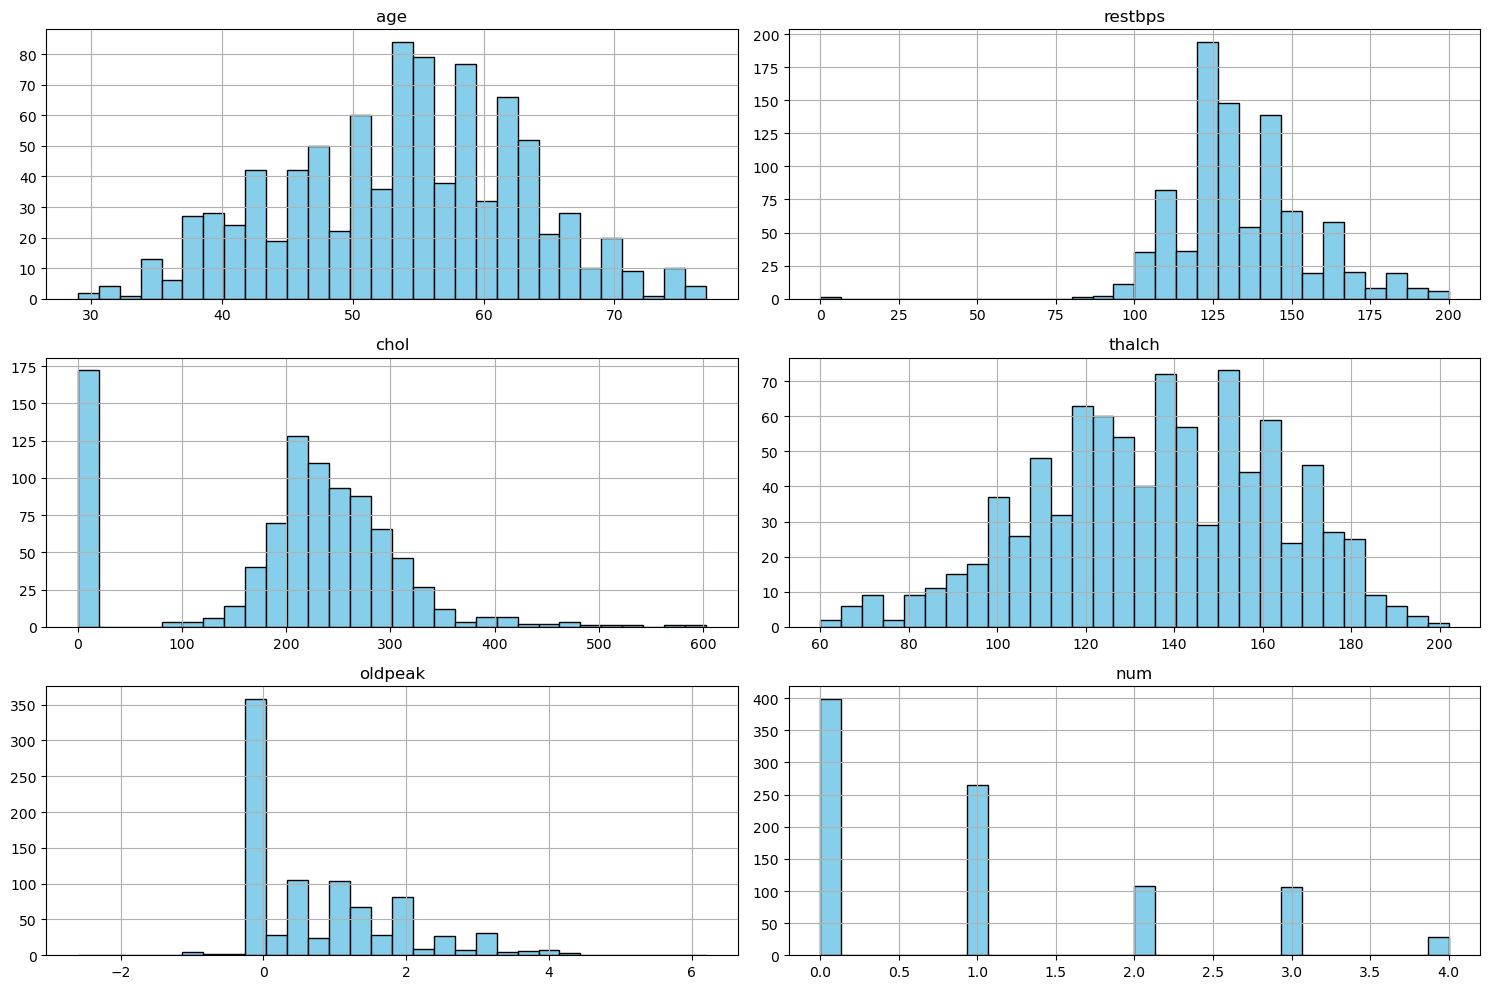

In [22]:
df1.hist(bins=30, figsize=(15, 10), color='skyblue', edgecolor='black')
plt.tight_layout()
plt.show()

### Count plot - visualize categorical columns

In [23]:
categorical_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal', 'num']

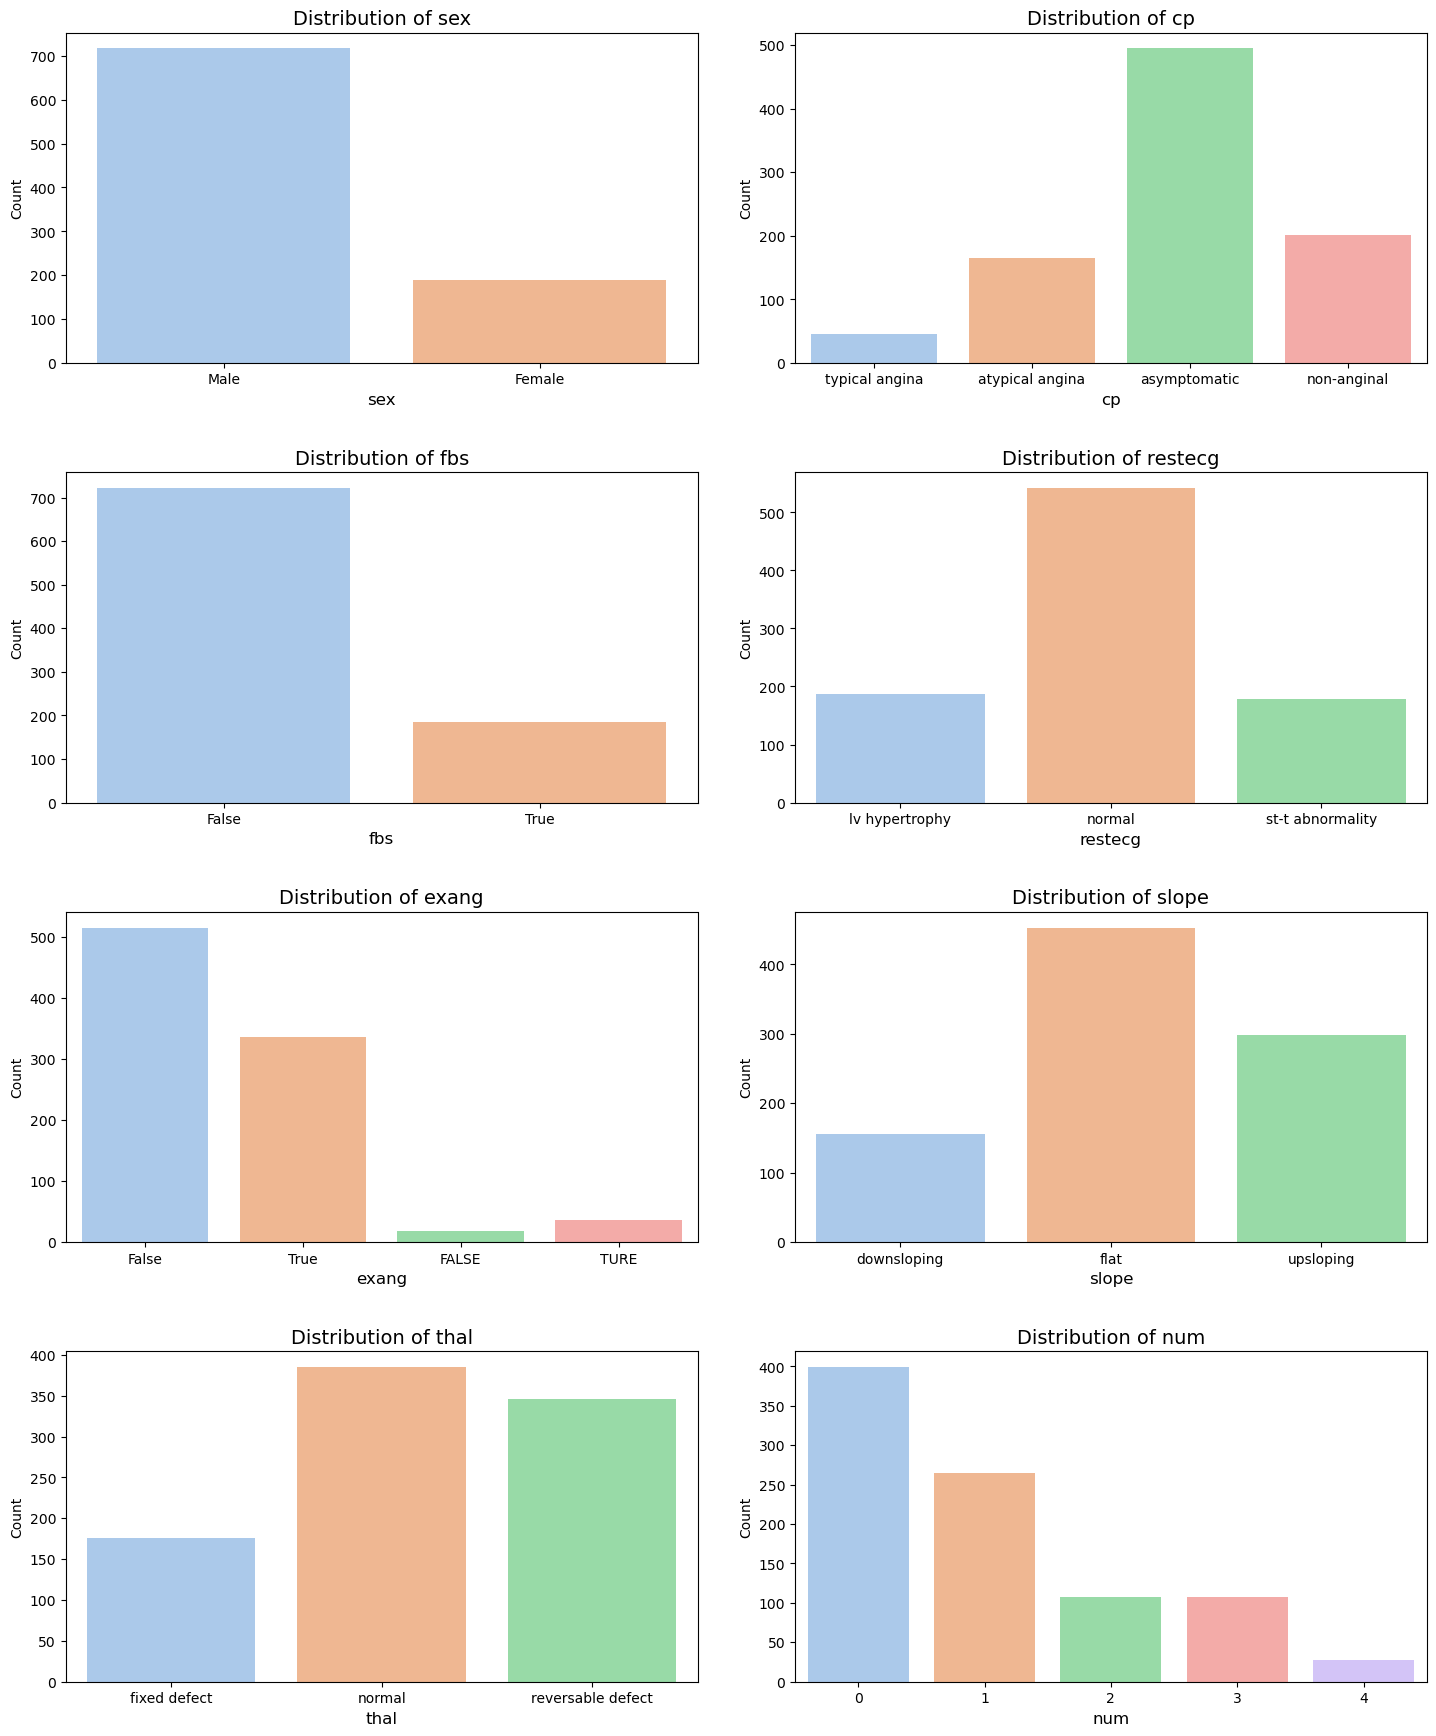

In [24]:
plt.figure(figsize=(15, 18))

for i, col in enumerate(categorical_cols, 1):
    plt.subplot(4, 2, i)  # 4 rows, 2 columns grid
    sns.countplot(x=col, data=df1, palette='pastel')
    plt.title(f'Distribution of {col}', fontsize=14)
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Count')
    plt.tight_layout(pad=3.0)

plt.show()

## Boxplot for outlier detection - Selective outlier removal on numerical columns 

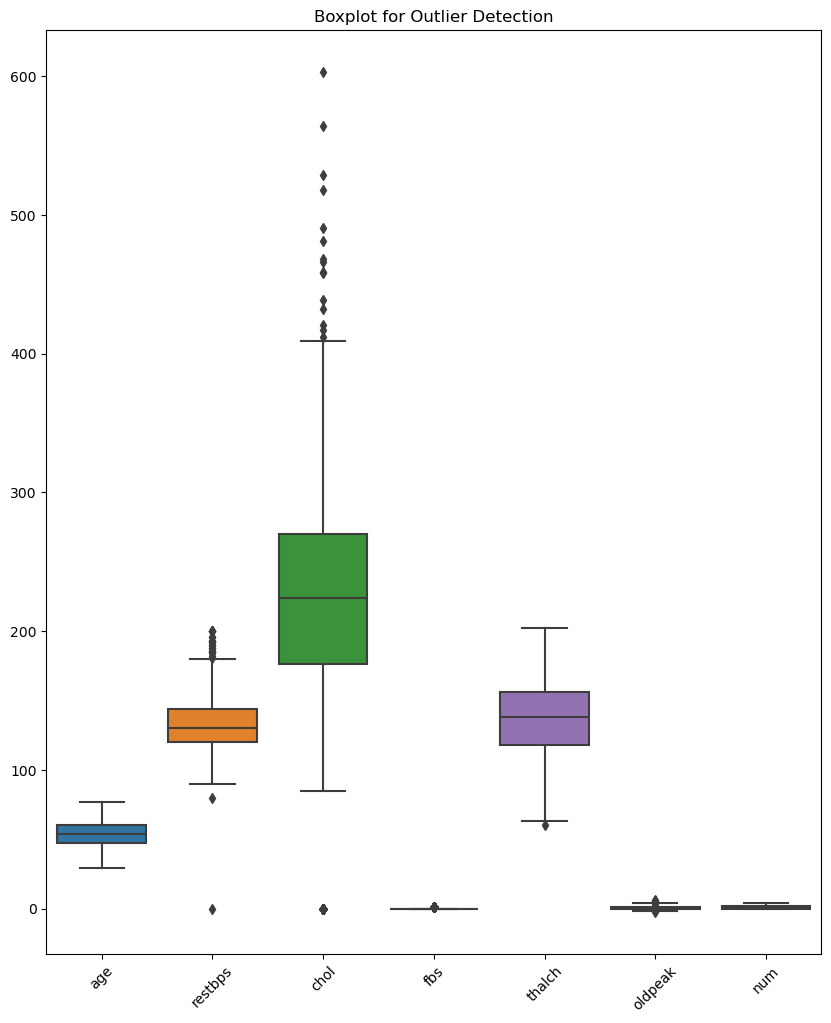

In [25]:
plt.figure(figsize=(10,12))
sns.boxplot(data=df1)
plt.xticks(rotation=45)
plt.title("Boxplot for Outlier Detection")
plt.show()

In [26]:
from scipy.stats import iqr

### Function to detect and remove outliers

In [27]:
def remove_outliers_iqr(data2, cols, factor=1.5):
    mask = pd.Series(True, index=data2.index)
    for col in cols:
        Q1 = data2[col].quantile(0.25)
        Q3 = data2[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - factor * IQR
        upper = Q3 + factor * IQR
        mask &= data2[col].between(lower, upper)
    return data2[mask]

In [28]:
cols_to_check = ['age', 'restbps', 'chol', 'thalch', 'oldpeak']

In [29]:
data_cleaned = remove_outliers_iqr(df1, cols_to_check)

In [30]:
print(f"Rows before: {df1.shape[0]}, after: {data_cleaned.shape[0]}")

Rows before: 907, after: 692


In [31]:
print(df1['num'].value_counts())

num
0    399
1    265
2    108
3    107
4     28
Name: count, dtype: int64


In [32]:
print(data_cleaned['num'].value_counts())

num
0    365
1    194
3     59
2     58
4     16
Name: count, dtype: int64


In [33]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 692 entries, 0 to 907
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   age      692 non-null    int64  
 1   sex      692 non-null    object 
 2   cp       692 non-null    object 
 3   restbps  692 non-null    int64  
 4   chol     692 non-null    int64  
 5   fbs      692 non-null    bool   
 6   restecg  692 non-null    object 
 7   thalch   692 non-null    int64  
 8   exang    692 non-null    object 
 9   oldpeak  692 non-null    float64
 10  slope    692 non-null    object 
 11  thal     692 non-null    object 
 12  num      692 non-null    int64  
dtypes: bool(1), float64(1), int64(5), object(6)
memory usage: 71.0+ KB


## Feature Engineering

### Label encoding

In [34]:
from sklearn.preprocessing import LabelEncoder

In [35]:
df1.dtypes

age          int64
sex         object
cp          object
restbps      int64
chol         int64
fbs           bool
restecg     object
thalch       int64
exang       object
oldpeak    float64
slope       object
thal        object
num          int64
dtype: object

### Converting boolean column to integer

In [36]:
data_cleaned['fbs'] = data_cleaned['fbs'].astype(int)

### Categorical (object) columns to str

In [37]:
categorical_cols = data_cleaned.select_dtypes(include='object').columns

In [38]:
for col in data_cleaned.select_dtypes(include='object').columns:
    unique_types = data_cleaned[col].map(type).unique()
    print(f"{col}: {unique_types}")

sex: [<class 'str'>]
cp: [<class 'str'>]
restecg: [<class 'str'>]
exang: [<class 'bool'> <class 'str'>]
slope: [<class 'str'>]
thal: [<class 'str'>]


In [39]:
for col in categorical_cols:
    data_cleaned[col] = data_cleaned[col].astype(str)

### Label Encode categorical columns

In [40]:
encoder = LabelEncoder()

In [41]:
for col in data_cleaned.select_dtypes(include='object').columns:
    data_cleaned[col] = encoder.fit_transform(data_cleaned[col])

In [42]:
data_cleaned.dtypes

age          int64
sex          int32
cp           int32
restbps      int64
chol         int64
fbs          int32
restecg      int32
thalch       int64
exang        int32
oldpeak    float64
slope        int32
thal         int32
num          int64
dtype: object

In [43]:
print(data_cleaned.isnull().sum())

age        0
sex        0
cp         0
restbps    0
chol       0
fbs        0
restecg    0
thalch     0
exang      0
oldpeak    0
slope      0
thal       0
num        0
dtype: int64


## Decision Tree Classification

### Dataset split into training and testing sets ( using an 80-20 split).

In [44]:
from sklearn.model_selection import train_test_split

In [45]:
data_cleaned.head(1)

,age,sex,cp,restbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,1,3,145,233,1,0,150,1,2.3,0,0,0


In [46]:
X = data_cleaned.iloc[:, :12]
y = data_cleaned.iloc[:,12]

In [47]:
X.head()

,age,sex,cp,restbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal
0,63,1,3,145,233,1,0,150,1,2.3,0,0
1,41,1,1,135,203,0,1,132,1,0.0,1,0
2,57,1,0,140,192,0,1,148,1,0.4,1,0
3,52,1,3,118,186,0,0,190,1,0.0,1,0
4,57,1,0,110,201,0,1,126,3,1.5,1,0


In [48]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: num, dtype: int64

In [49]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2)

In [50]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((553, 12), (139, 12), (553,), (139,))

### Building the model

In [51]:
from sklearn.tree import DecisionTreeClassifier

In [52]:
clf = DecisionTreeClassifier(max_depth=8, max_leaf_nodes=10, criterion='entropy', random_state=42)

In [53]:
clf.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=8, max_leaf_nodes=10,
                       random_state=42)

#### Predict and get the training and testing metricts

In [54]:
yhat_train = clf.predict(X_train)

In [55]:
from sklearn.metrics import confusion_matrix, classification_report

In [56]:
cm = confusion_matrix(y_train, yhat_train)
cm

array([[264,  14,   0,  10,   0],
       [ 77,  55,   5,  13,   0],
       [ 17,   3,  15,  12,   0],
       [ 19,  12,   6,  17,   0],
       [  3,   2,   5,   4,   0]], dtype=int64)

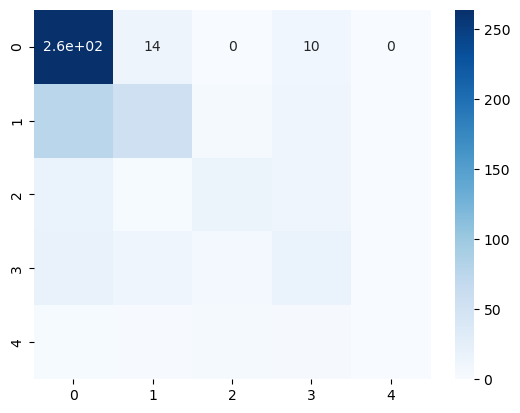

In [57]:
sns.heatmap(cm, annot=True, cmap='Blues')
plt.show()

In [58]:
print(classification_report(y_train,yhat_train))

              precision    recall  f1-score   support

           0       0.69      0.92      0.79       288
           1       0.64      0.37      0.47       150
           2       0.48      0.32      0.38        47
           3       0.30      0.31      0.31        54
           4       0.00      0.00      0.00        14

    accuracy                           0.63       553
   macro avg       0.42      0.38      0.39       553
weighted avg       0.61      0.63      0.60       553



In [59]:
yhat_test = clf.predict(X_test)

In [60]:
cm = confusion_matrix(y_test,yhat_test)
cm

array([[74,  1,  0,  2,  0],
       [21, 10,  3, 10,  0],
       [ 3,  4,  0,  4,  0],
       [ 2,  0,  2,  1,  0],
       [ 0,  0,  1,  1,  0]], dtype=int64)

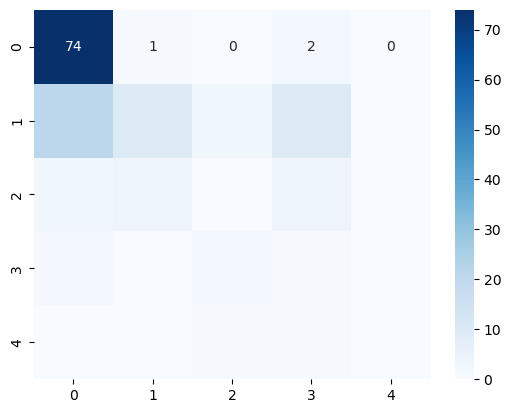

In [61]:
sns.heatmap(cm, annot=True, cmap='Blues')
plt.show()

In [62]:
print(classification_report(y_test,yhat_test))

              precision    recall  f1-score   support

           0       0.74      0.96      0.84        77
           1       0.67      0.23      0.34        44
           2       0.00      0.00      0.00        11
           3       0.06      0.20      0.09         5
           4       0.00      0.00      0.00         2

    accuracy                           0.61       139
   macro avg       0.29      0.28      0.25       139
weighted avg       0.62      0.61      0.57       139



## Hyperparameter Tuning - using GridSearchCV

In [63]:
from sklearn.model_selection import GridSearchCV

In [64]:
# Define parameter grid
param_grid = {
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 7],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy'],
    'class_weight': [None, 'balanced'],
    'splitter': ['best', 'random'],
}

In [65]:
# base model
dt = DecisionTreeClassifier(random_state=42)

In [66]:
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid,
                           cv=5, scoring='accuracy', n_jobs=-1)

In [67]:
grid_search.fit(X_train, y_train)
print("Best parameters found:", grid_search.best_params_)

Best parameters found: {'class_weight': None, 'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'random'}


In [68]:
clf1 = DecisionTreeClassifier(class_weight=None,criterion='entropy',max_depth=3,min_samples_leaf=1,min_samples_split=2,splitter='random',random_state=42)

In [69]:
clf1.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42,
                       splitter='random')

In [70]:
yhat_train = clf1.predict(X_train)
yhat_test = clf1.predict(X_test)

In [71]:
print("Train Classification Report:\n", classification_report(y_train, yhat_train))

Train Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.89      0.79       288
           1       0.45      0.52      0.48       150
           2       0.39      0.19      0.26        47
           3       0.00      0.00      0.00        54
           4       0.00      0.00      0.00        14

    accuracy                           0.62       553
   macro avg       0.31      0.32      0.31       553
weighted avg       0.53      0.62      0.56       553



In [72]:
cm = confusion_matrix(y_train, yhat_train)
cm

array([[255,  33,   0,   0,   0],
       [ 66,  78,   6,   0,   0],
       [ 15,  23,   9,   0,   0],
       [ 14,  36,   4,   0,   0],
       [  6,   4,   4,   0,   0]], dtype=int64)

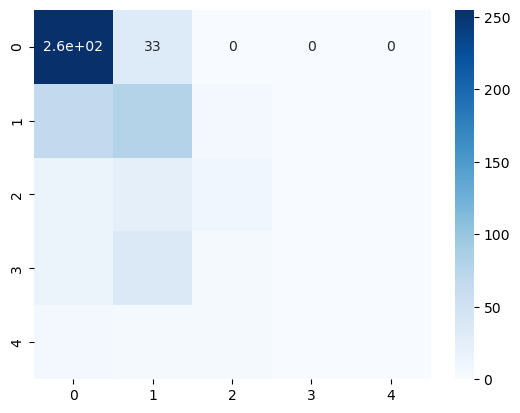

In [73]:
sns.heatmap(cm, annot=True, cmap='Blues')
plt.show()

In [74]:
print("Test Classification Report:\n", classification_report(y_test, yhat_test))

Test Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.87      0.80        77
           1       0.58      0.59      0.58        44
           2       0.25      0.09      0.13        11
           3       0.00      0.00      0.00         5
           4       0.00      0.00      0.00         2

    accuracy                           0.68       139
   macro avg       0.31      0.31      0.30       139
weighted avg       0.62      0.68      0.64       139



In [75]:
cm = confusion_matrix(y_test, yhat_test)
cm

array([[67, 10,  0,  0,  0],
       [17, 26,  1,  0,  0],
       [ 3,  7,  1,  0,  0],
       [ 2,  2,  1,  0,  0],
       [ 1,  0,  1,  0,  0]], dtype=int64)

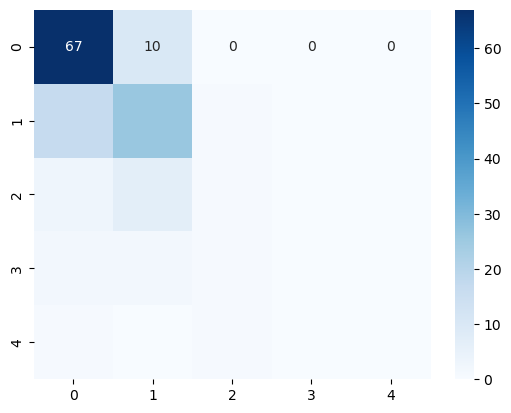

In [76]:
sns.heatmap(cm, annot=True, cmap='Blues')
plt.show()

## Model Evaluation and Analysis

#### From the Classification Reports obtained for train and test sets, for both before and after hyperparameter tuning, 

Test set accuracy before hyperparameter tuning = 61% and after is 68%, shows the importance of tuning the hyperparameters used for the model.

The model performs best on class 0 but struggles with minority classes.

Class imbalance is likely affecting recall and precision for underrepresented classes.

Even after hyperparameter tuning, performance improved on dominant classes, but others remained weak showing classic class imbalance issue.

### visualizing the trained Decision Tree model as a tree diagram

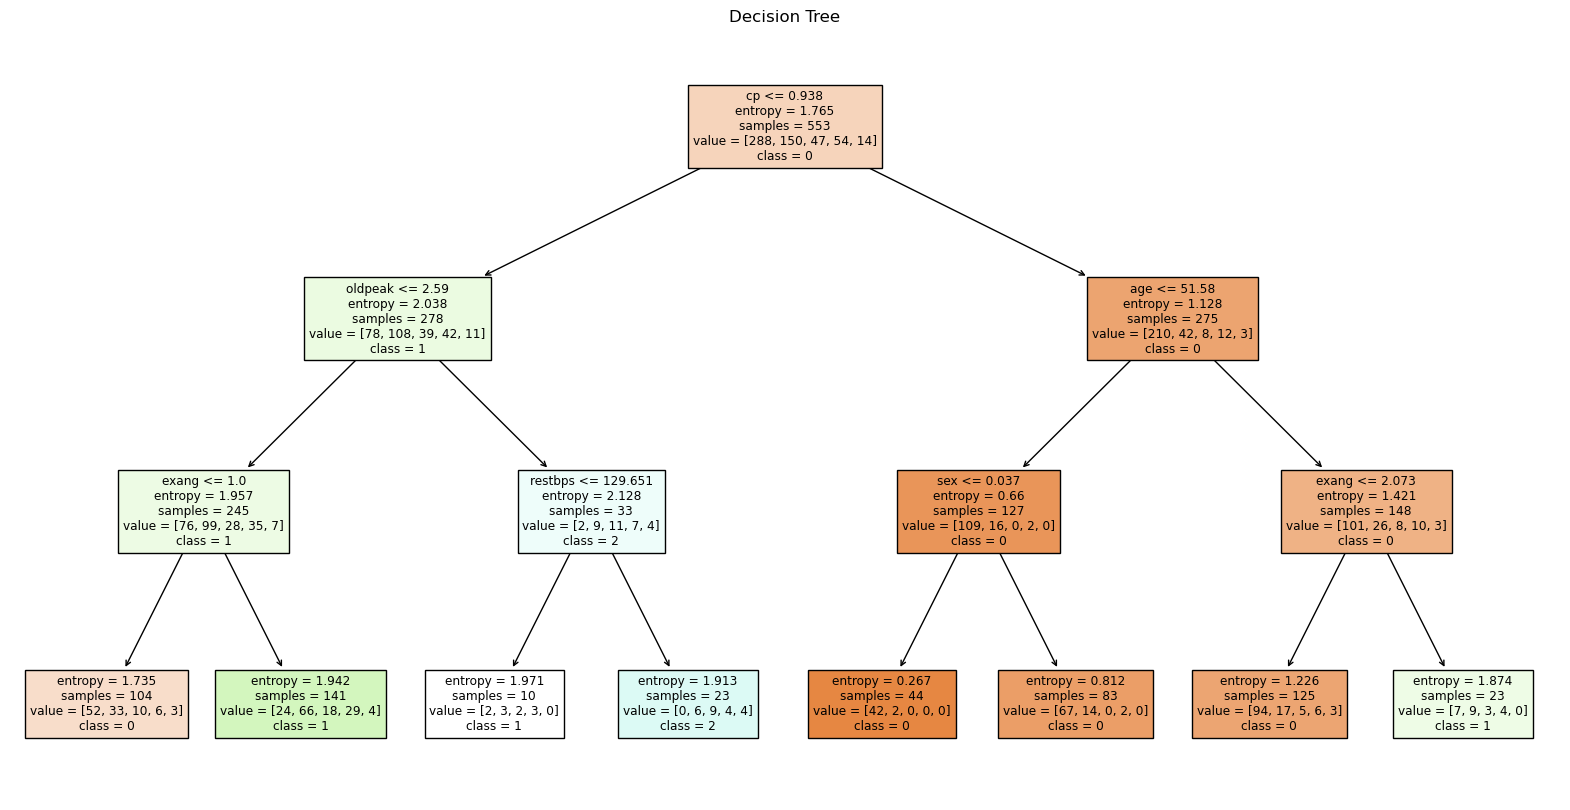

In [102]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20,10))
plot_tree(clf1, feature_names=['age', 'sex', 'cp', 'restbps', 'chol', 'fbs', 'restecg', 'thalch',
       'exang', 'oldpeak', 'slope', 'thal'], class_names=[str(i) for i in clf1.classes_], filled=True)
plt.title('Decision Tree')
plt.show()

### Feature Importance Analysis

In [77]:
feature_names = X_train.columns

In [79]:
importances = clf1.feature_importances_

In [80]:
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

In [81]:
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

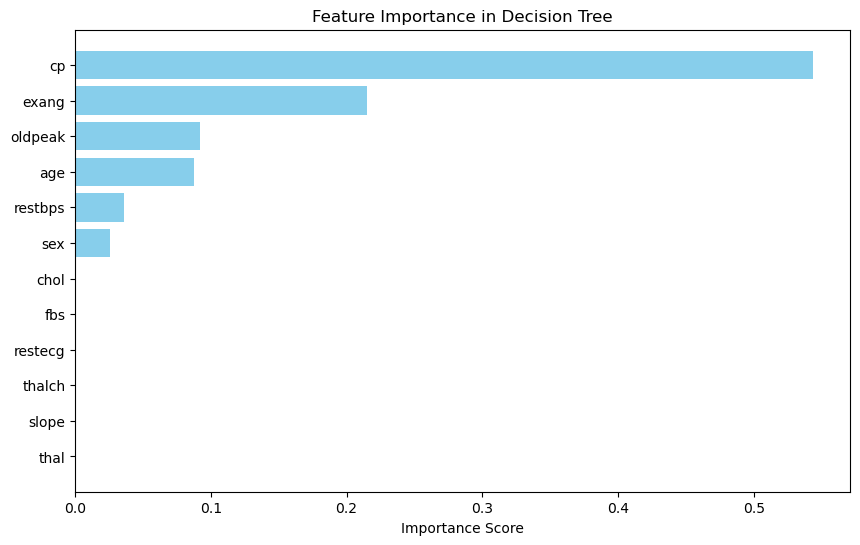

In [82]:
# Plot
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance Score')
plt.title('Feature Importance in Decision Tree')
plt.gca().invert_yaxis()  # Highest at top
plt.show()

#### From the plot, feature 'cp' has the highest importance, while features like ['thal', 'slope', 'thalch', 'restecg', 'fbs'] seem to have the least importance, not contributing to building the model

### Trying to build model by dropping least important features

In [83]:
# Set a threshold for feature importance
threshold = 0.05

In [84]:
# Get important features only
important_features = feature_importance_df[feature_importance_df['Importance'] >= threshold]['Feature'].tolist()

print("Selected features:", important_features)


Selected features: ['cp', 'exang', 'oldpeak', 'age']


In [85]:
# Keep only the important features
X_train_selected = X_train[important_features]
X_test_selected = X_test[important_features]

In [86]:
grid_search.fit(X_train_selected, y_train)
print("Best parameters found:", grid_search.best_params_)

Best parameters found: {'class_weight': None, 'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'random'}


In [87]:
# Initialize and train classifier
clf_reduced = DecisionTreeClassifier(class_weight=None,criterion='gini',max_depth=5,min_samples_leaf=4,min_samples_split=2,splitter='random',random_state=42)
clf_reduced.fit(X_train_selected, y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=4, random_state=42,
                       splitter='random')

In [88]:
# Predict on test data
y_pred_reduced = clf_reduced.predict(X_test_selected)

In [89]:
# Print classification report
print("Classification Report (Reduced Features):")
print(classification_report(y_test, y_pred_reduced))

Classification Report (Reduced Features):
              precision    recall  f1-score   support

           0       0.78      0.95      0.85        77
           1       0.69      0.41      0.51        44
           2       0.19      0.27      0.22        11
           3       0.00      0.00      0.00         5
           4       0.00      0.00      0.00         2

    accuracy                           0.68       139
   macro avg       0.33      0.33      0.32       139
weighted avg       0.66      0.68      0.65       139



In [90]:
cm = confusion_matrix(y_test, y_pred_reduced)
cm

array([[73,  2,  1,  1,  0],
       [15, 18, 10,  1,  0],
       [ 3,  5,  3,  0,  0],
       [ 2,  1,  2,  0,  0],
       [ 1,  0,  0,  1,  0]], dtype=int64)

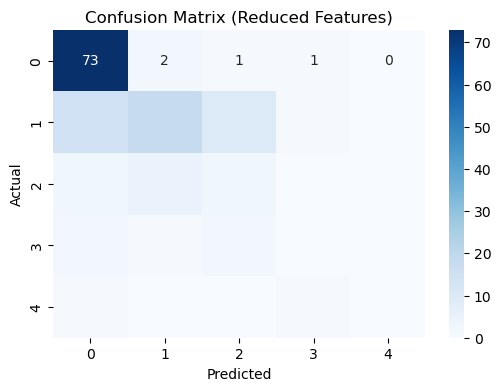

In [91]:
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix (Reduced Features)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


## Interpretation:

#### Although some features appeared less important individually, removing them didnt improve model performance, the accuracy value (68%) for test data remains the same in both cases. It is better to retain these features to preserve potential interaction effects between the features and to maintain the completeness of the dataset for future modeling iterations.

### Combining classes to handle class imbalance (from 5 to 3)

In [92]:
def map_classes(x):
    if x == 0:
        return 0  # no disease
    elif x in [1, 2]:
        return 1  # mild disease
    else:
        return 2  # severe disease
data = data_cleaned.copy()
data['num'] = data['num'].apply(map_classes)

In [93]:
X = data.drop('num', axis=1)
y = data['num']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [94]:
grid_search.fit(X_train, y_train)
print("Best parameters found:", grid_search.best_params_)

Best parameters found: {'class_weight': None, 'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'random'}


In [95]:
# Create model
clf_new =DecisionTreeClassifier(class_weight=None,criterion='gini',min_samples_leaf=4,min_samples_split=10,splitter='random',random_state=42)
clf_new.fit(X_train, y_train)

DecisionTreeClassifier(min_samples_leaf=4, min_samples_split=10,
                       random_state=42, splitter='random')

In [96]:
# Predict
y_train_pred = clf_new.predict(X_train)
y_test_pred = clf_new.predict(X_test)

In [97]:
print("Train Classification Report:")
print(classification_report(y_train, y_train_pred))

Train Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.93      0.88       292
           1       0.76      0.73      0.74       201
           2       0.66      0.38      0.48        60

    accuracy                           0.80       553
   macro avg       0.75      0.68      0.70       553
weighted avg       0.79      0.80      0.79       553



In [98]:
print("Test Classification Report:")
print(classification_report(y_test, y_test_pred))

Test Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.82      0.78        73
           1       0.55      0.51      0.53        51
           2       0.08      0.07      0.07        15

    accuracy                           0.63       139
   macro avg       0.46      0.47      0.46       139
weighted avg       0.61      0.63      0.61       139



In [99]:
cm = confusion_matrix(y_test, y_test_pred)
cm

array([[60, 11,  2],
       [16, 26,  9],
       [ 4, 10,  1]], dtype=int64)

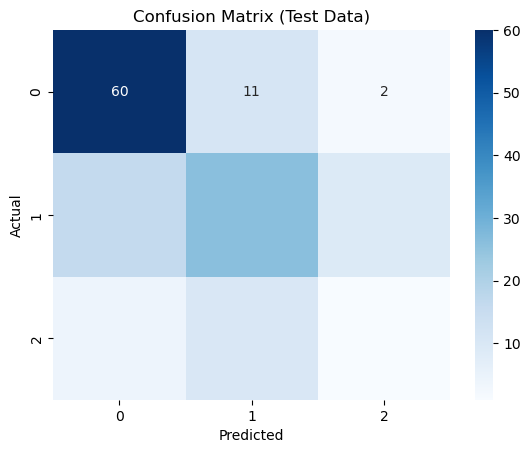

In [100]:
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Test Data)')
plt.show()

## Analysis:

#### After combining the classes, the overall model accuracy on the test data decreased from 68% to 63%.
In this case, combining classes did not improve model performance and instead led to a decrease in accuracy. It suggests that the original class structure, despite its imbalance, captured meaningful patterns better suited for decision tree classification.

### Interview questions

### What are some common hyperparameters of Decision Tree models, and how do they affect the model's performance?
Common hyperparameters in Decision Tree models include:

max_depth: The maximum depth of the tree. A deeper tree captures more patterns but risks overfitting. A shallow tree may underfit the data.

min_samples_split: The minimum number of samples required to split an internal node. Increasing this value can reduce overfitting by preventing the tree from making splits that capture noise.

min_samples_leaf: The minimum number of samples required to be at a leaf node. Larger values force the tree to have broader leaves, reducing overfitting.

criterion: The function used to measure the quality of a split (e.g., gini for Gini impurity or entropy for Information Gain). Different criteria might slightly impact how splits are made.

splitter: The strategy used to choose the split at each node (best chooses the best split, random chooses the best random split).

class_weight: Weights associated with classes to handle class imbalance. Setting this to 'balanced' adjusts weights inversely proportional to class frequencies in the input data.

Tuning these hyperparameters controls model complexity, overfitting, and underfitting, improving predictive performance.

### What is the difference between Label Encoding and One-Hot Encoding?

Label Encoding converts each category in a categorical feature into a unique integer label.
Example: ["Male", "Female"] → [0, 1]
Limitation: It introduces an unintended ordinal relationship (e.g., 1 > 0), which may mislead some models.

One-Hot Encoding creates new binary columns (dummy variables) for each category.
Example: ["Male", "Female"] → ["Male"=1, "Female"=0], ["Male"=0, "Female"=1]
Advantage: It avoids implying any ordinal relationship between categories.
Limitation: Increases dimensionality if the number of categories is large.

Use Label Encoding when: The categorical variable is ordinal (categories have an order).
Use One-Hot Encoding when: The categorical variable is nominal (categories are just names without any order).